<a href="https://colab.research.google.com/github/Kristoffer-Hallam/Pytfolio_DS/blob/main/WordCloud_London.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Creating a WordlCloud in Python

How to create a wordcloud out of a specific database?
Well, initially one must define what **wordcloud** is. 

> **Wordcloud (or cloud of tags) is a powerful data visualization, especially when working with texts, documents, research, and other.**

While creating a wordcloud, the module counts on its own the frequency in which a word is placed in the text. The size of each word is defined from these frequencies. Hence, a bigger sized word shows that it appears more regularly within the text. Words that appers less often are displayed in a smaller size.

This analysis is very useful as the more regular words are highlighted in the figure.


First of all, we need to install the **wordcloud** module and import all the necessaries modules.

In [ ]:
# installing wordcloud
!pip install wordcloud -q

In [ ]:
# import necessary modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [ ]:
# mounting drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


For the subsequent analysis, we downloaded London's Airbnb database from [Inside Airbnb](http://insideairbnb.com/get-the-data/) website. It's a very good repository for data scientists to grab renting type data and develop projects.

I, then, extracted all the text under *description* column from all advertisement in order to find the most used words. Follow up to see how to do it.

## Importing data from Airbnb

The Airbnb website has an available database for download where one can search for most of the tops cities around the world. The chosen *dataset*, which is related to the city of London - UK, is displayed below and inserted into this drive for easy manipulation. For direct download please navigate to the following [link to download](http://data.insideairbnb.com/united-kingdom/england/london/2022-03-09/data/listings.csv.gz) and click on the **listings.csv.gz** link in the website as shown on the figure below.

<!-- <img title="Dataset" alt="Dataset" src="drive/MyDrive/London/website_dataset.png"> -->

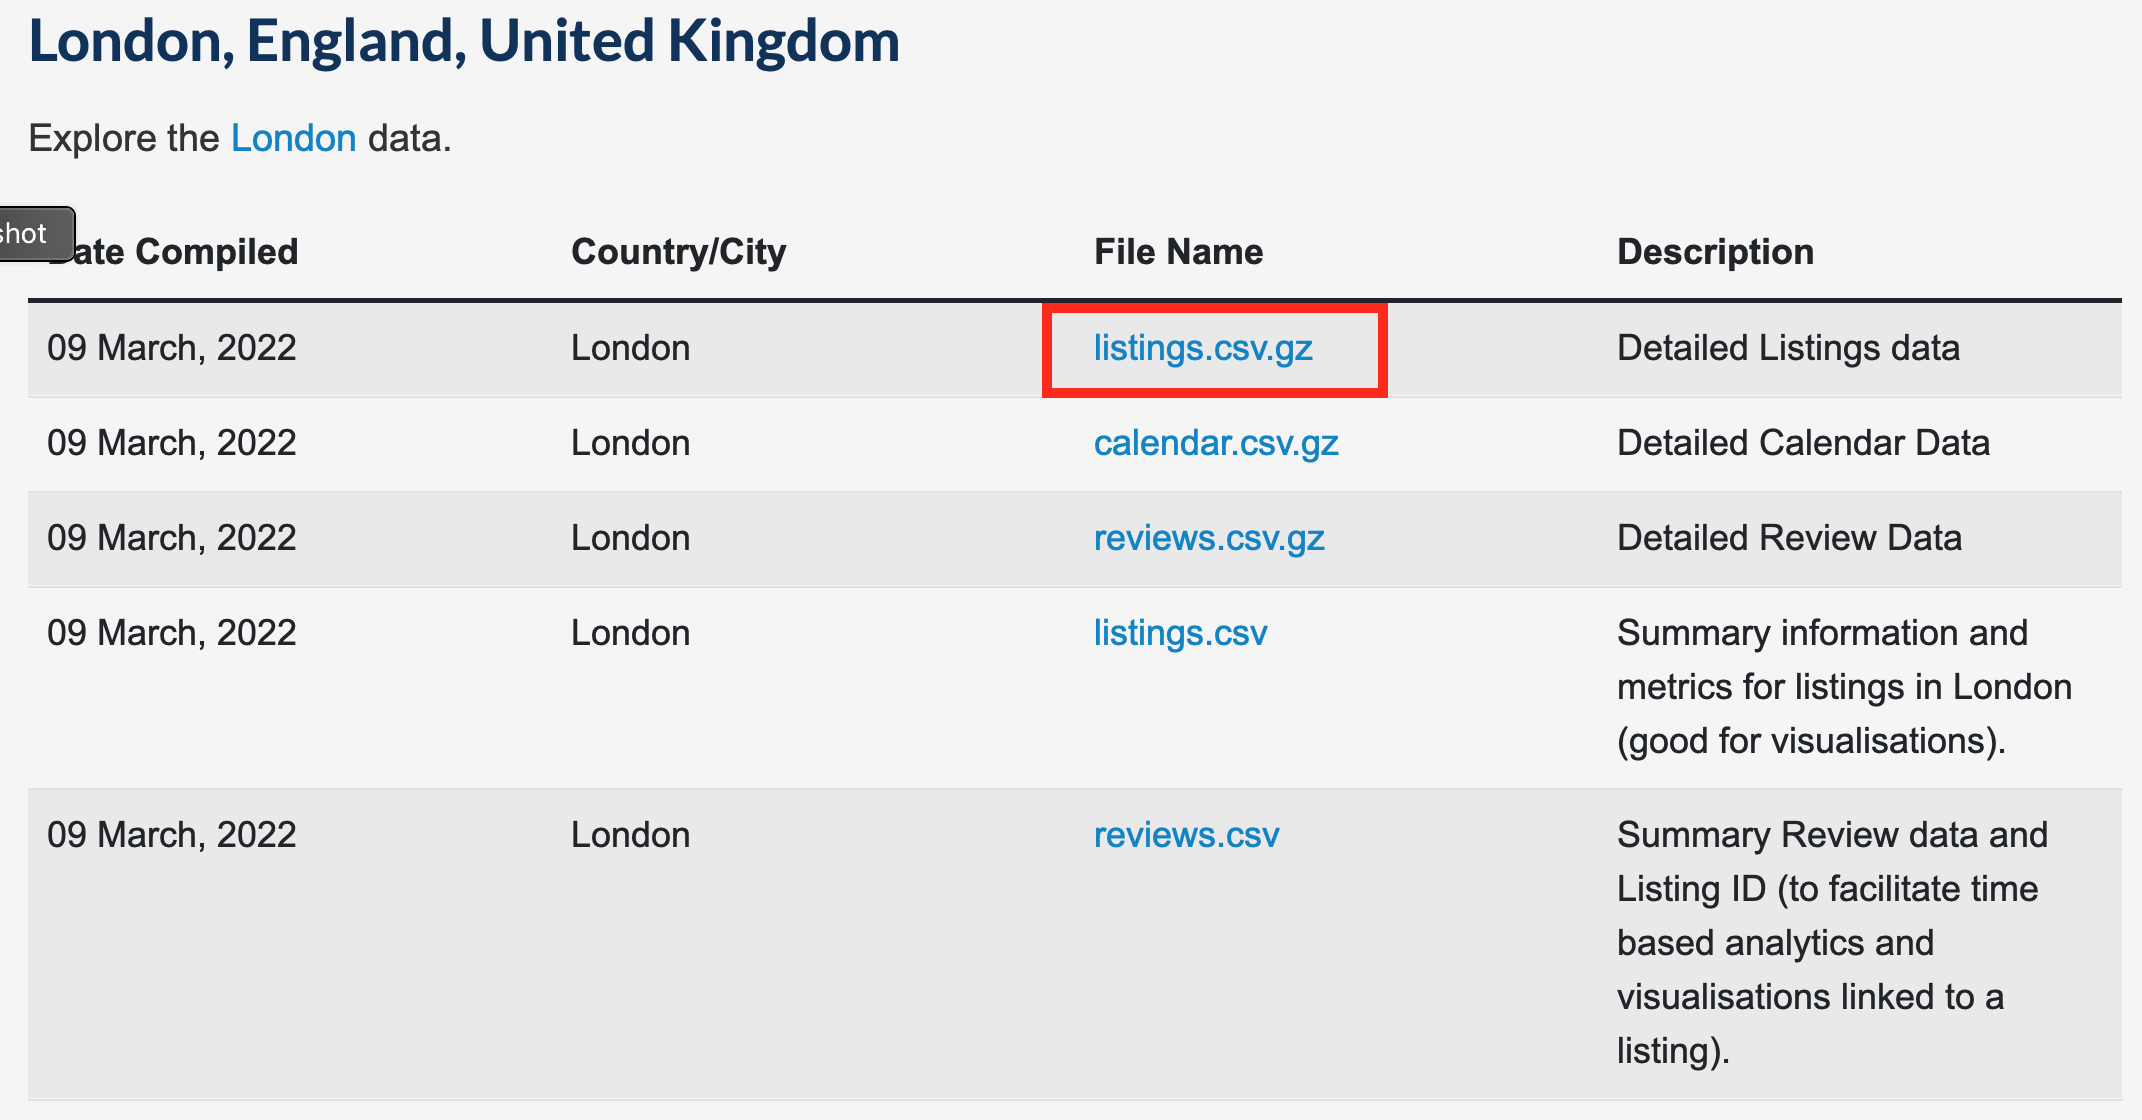

In [ ]:
# read csv file and make it a dataframe
path_to_file = "drive/MyDrive/London/"
df = pd.read_csv(path_to_file+"full_listings.csv")

In [ ]:
# let's check the shape of the dataframe
df.shape

(66632, 74)

The dataset has 66632 rows and 74 columns. However, our aim is to apply the wordcloud to the description column only which is the one that has the advertisement information. Thus, the following cell shows how to select the mentioned column and reduce the amount of data we need.

In [ ]:
# pick 'description' column only
summary = df.dropna(subset=['description'], axis=0)['description']
# df.head(3)

In [ ]:
# display first 3 values corresponding to the selected column
for i in range(100, 104):
  display(summary.iloc[i])
  print('\n' + '-'*20)

'This is a home not a hotel - for the cost guests have lots of space with added benefit of it not being a flat but a whole little Notting Hill house with an outdoor terrace.  It’s bohemian, a little imperfect and charming. The central location results in street noise but the bedroom is quiet.<br /><br /><b>The space</b><br />This charming 1 bedroom with en-suite bathroom apartment is set within a whole self-contained house in the heart of trendy Notting Hill Gate. You don’t share the house with anyone else.<br /><br />With its own terrace, perfect for spring/summer breakfasts or dinner with friends - this charming but casual apartment is split across 3 levels with a separate kitchen. Let furnished. All mod cons with excellent wifi access. The Notting Hill Gate tube station is within 1 minute walk.<br /><br />There are basic provisions in the kitchen like tea, coffee and some breakfast options. Guests are welcome to use all in the flat - it is a home away from home. <br /><br />Ideas fo


--------------------


'Loft room with bath loo and sink<br /><br /><b>The space</b><br />A beautiful comfortable room is available overlooking a peaceful park, it is only  300m from the River Thames which leads into Richmond to the west and the embankment to the east. <br /><br />Just a 5 minute walk away is Hammersmith underground,  which has direct access to 3 tube lines putting you in the west end in 15 minutes, the city in 25 minutes, Heathrow in 25 minutes and Stratford in 43 minutes. Across on the other side of the Thames you will find the London Wetlands centre, which has free guided tours daily. <br /><br />The comes with large comfortable bed a bath and loo. There is also wireless internet and access to a large modern fully equipped kitchen.  The property is over looking a great park (Frank Banfield)  and is near many great local restaurants and bars,  one of which includes The River Cafe which is just a 5 minute walk away. <br /><br />If you have any questions please send me a message and I will h


--------------------


"<b>The space</b><br />One lovely double bedroom for one guest only in a quiet area 25 minutes by tube from central London. Guests have use of the kitchen and bathroom, with constant hot water and separate toilet. The room includes a double bed, towels and linen, free WiFi and TV. The apartment is shared with the owner and other guests. The apartment is very clean and tidy and is situated in Bounds Green, a bus ride away from Muswell Hill with it's many stylish bars, cafes and restaurants and a local park minutes away with a great view over London and with 25 minutes to Leicester Square and all London's tourist attractions this is perfectly situated. It is also  only 30 mins train away from the city, the nearest station is Bounds Green  which is roughly around a 10 minute walk  away. <br /><br /><br />The preferred guest would for this accommodation would be for a single person, unfortunately the rooms cannot accommodate families.<br /><br />I look forward to hearing from you.<br /><br


--------------------


'<b>The space</b><br />Nice double bedroom in NW London. We are going away for 2 weeks, and would like to find someone nice to stay in our flat while we are away. The flat has amazing location, 1 minute walk from the tube station, very central, clean and comfy.'


--------------------


All the words contained in the description column must be united or joined in a unique text. In this dataset, we have 45_481_357 words to put together which could make a hard time for those intending to pursue a traditional analysis. Fortunatelly, wordcloud turn things easier for the kind of data munging we want to do.

In [ ]:
# concatenate the words
all_summary = " ".join(s for s in summary)

# sum up all existing words
print("Quantidade de Palavras: {}".format(len(all_summary)))

Quantidade de Palavras: 45481357


First of all, a list variable containing some *stopwords* must be declared. They are words which have to be removed from the wordcloud because they don't add any significant information, but appear a lot. Some of these words are "a", "and", "of" and so on.

Then, we instance a WordCloud type object and provide certain arguments as follows. After that, call the generate() method and the wordcloud will be set.


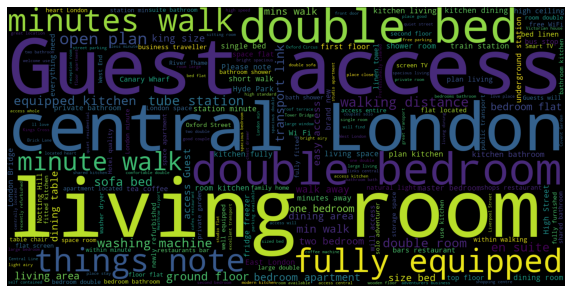

In [ ]:
# lista de stopword
stopwords = set(STOPWORDS)
stopwords.update(["<b>","<br ","br","<br>","<br />","a","in","to","the","and",",","."])

# gerar uma wordcloud
wordcloud = WordCloud(stopwords=stopwords,
                      background_color="black",
                      width=1600, height=800).generate(all_summary)

# mostrar a imagem final
fig, ax = plt.subplots(figsize=(10,6))
ax.imshow(wordcloud, interpolation='bilinear')
ax.set_axis_off()

plt.imshow(wordcloud);
wordcloud.to_file("airbnb_summary_wordcloud.png")

From the above image, we can see that the words:
* Guest access
* central London
* living room
happen to appear the most in our text. By the look of it, there are more advertisements mentioning *living rooms* and the *central London* area.

### WordCloud displayed over an image

At this point, the wordcloud analysis has been finished. However, there is a way of incrementing some visual effects over the wordcloud image and it is by using image masks.

When it comes to think about the city of London, one of the most visited sightseeing places is the Big Ben.

[![Big Ben](https://img.favpng.com/20/5/17/big-ben-book-drawing-png-favpng-FX4CZHKhUbc7y3wFDa5tfeyun.jpg)]()

The wordcloud module analises the pixel colours and consider the black coloured region as a place to draw the words. Let's check it by executing the following commands.

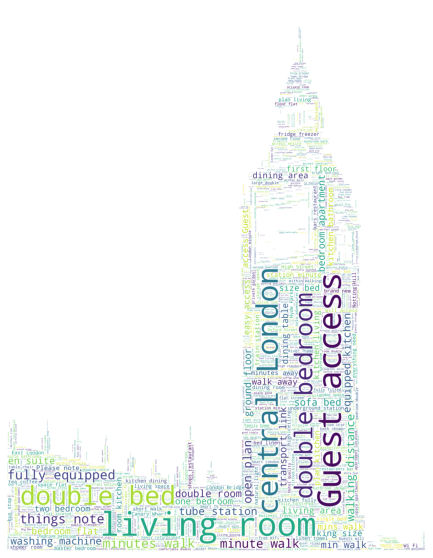

In [ ]:
# endereço LOCAL da SUA imagem
london_mask = np.array(Image.open(path_to_file + "big_ben2.png"))
   
# gerar uma wordcloud
wordcloud = WordCloud(stopwords=stopwords,
                      background_color="white",
                      width=1000, height=1000, max_words=2000,
                      mask=london_mask, max_font_size=200,
                      min_font_size=1).generate(all_summary)

# mostrar a imagem final
fig, ax = plt.subplots(figsize=(10,10))
ax.imshow(wordcloud, interpolation='bilinear')
ax.set_axis_off()

plt.imshow(wordcloud)
wordcloud.to_file("airbnb_summary_wordcloud.png")

See how it's simple? Just make sure your image has black and white values on it for the mask to work.

Wordcloud even makes it possible to change font, size of letters, the amount of maximum letters and background colour.

Let's try another image. How about the London Eye?

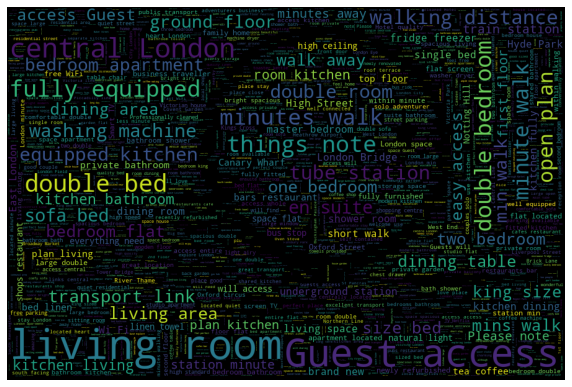

In [ ]:
# endereço LOCAL da SUA imagem
london_mask = np.array(Image.open(path_to_file + "london_eye.jpg"))
   
# gerar uma wordcloud
wordcloud = WordCloud(stopwords=stopwords,
                      background_color="black",
                      width=1000, height=1000, max_words=2000,
                      mask=london_mask, max_font_size=200,
                      min_font_size=1).generate(all_summary)

# mostrar a imagem final
fig, ax = plt.subplots(figsize=(10,10))
ax.imshow(wordcloud, interpolation='bilinear')
ax.set_axis_off()

plt.imshow(wordcloud)
wordcloud.to_file("airbnb_summary_wordcloud.png")

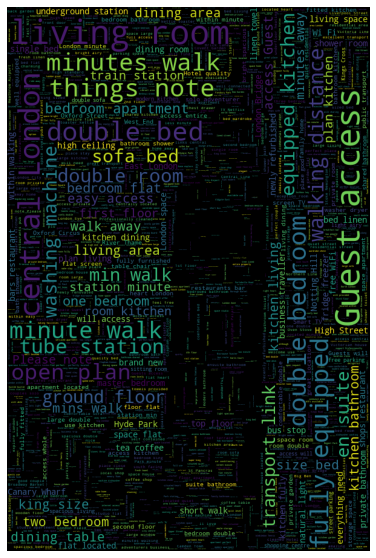

In [ ]:
# endereço LOCAL da SUA imagem
london_mask = np.array(Image.open(path_to_file + "big_ben3.jpg"))
   
# gerar uma wordcloud
wordcloud = WordCloud(stopwords=stopwords,
                      background_color="black",
                      width=1000, height=1000, max_words=2000,
                      mask=london_mask, max_font_size=200,
                      min_font_size=1).generate(all_summary)

# mostrar a imagem final
fig, ax = plt.subplots(figsize=(10,10))
ax.imshow(wordcloud, interpolation='bilinear')
ax.set_axis_off()

plt.imshow(wordcloud)
wordcloud.to_file("airbnb_summary_wordcloud.png")

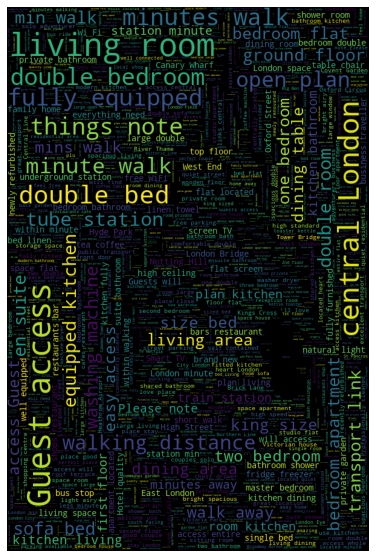

In [ ]:
# endereço LOCAL da SUA imagem
london_mask = np.array(Image.open(path_to_file + "big_ben.jpg"))
   
# gerar uma wordcloud
wordcloud = WordCloud(stopwords=stopwords,
                      background_color="black",
                      width=1000, height=1000, max_words=2000,
                      mask=london_mask, max_font_size=200,
                      min_font_size=1).generate(all_summary)

# mostrar a imagem final
fig, ax = plt.subplots(figsize=(10,10))
ax.imshow(wordcloud, interpolation='bilinear')
ax.set_axis_off()

plt.imshow(wordcloud)
wordcloud.to_file("airbnb_summary_wordcloud.png")